# Tensor Component Analysis (TCA)

**TODO**

- [ ] create separate github repositories for predicting behavioral traits from white matter using HCP-YA (i.e., `HCP-YA-*.ipynb`)

## Predicting Behavioral Traits using TCA factors

Using Tensor Component Analysis (TCA) factors to predict behavioral traits from Human Connectome Project Young Adult 1200 Subject (HCP-YA) diffusion magnetic resonsance imaging (dMRI) data.

**NOTE: Ethan's findings with HBN and PING suggest that white matter may not be predictive for behavioral traits**

---

### Unable to find evidence to support ability to predict behavioral traits using TCA factors from callosal tract profiles

---

**TODO** 

- [x] Run SGL and XGBoost on white matter tract profiles (see `HCP-YA-SGL.ipynb` and `HCP-YA-XGBoost.ipynb`

- [x] Run XGBoost using TCA subject factors to predict reading

### Dataset

##### Dataset Information

Human Connectome Project Young Adult (HCP-YA)
- https://www.humanconnectome.org/study/hcp-young-adult

Using Human Connectome Project Young Adult (HCP-YA) 1200 Subject Release:
- https://www.humanconnectome.org/study/hcp-young-adult/document/1200-subjects-data-release

    Release Reference Manual:
    - https://www.humanconnectome.org/storage/app/media/documentation/s1200/HCP_S1200_Release_Reference_Manual.pdf

In [1]:
def load():
    import pickle as pkl
    import numpy as np
    
    subjects = np.load('callosum_subjects.npy', allow_pickle=True)
    data = np.load('callosum_data.npy')
    mask = np.load('callosum_mask.npy')
    ensemble = pkl.load(open('callosum_ensemble.pkl', 'rb'))
    return subjects, data, mask, ensemble

In [2]:
_subjects, _data, _mask, _ensemble = load()

### HCP-YA Behavioral Predictions

Here we'd like to see if the factors have any predictive value. Look at whether TCA factors can predict behavoiral traits.

This would lend evidence to the idea that the factors found from TCA are significant.

**TODO** 

- [ ] ensure we were using all bundles and callosal data to be able to compare models

##### HCP-YA 1200 Subject Behavioral Data

**NOTE you must have access to HCP dataset**

To get access "Create an Account":
- https://db.humanconnectome.org/

**NOTE you must manually download the behavoiral data locally**

Data Dictonary:
- https://wiki.humanconnectome.org/display/PublicData/HCP-YA+Data+Dictionary-+Updated+for+the+1200+Subject+Release

In [3]:
def _get_behavioral(bucket='hcp.callosum', numeric=False, normalize=True):
    """
    https://wiki.humanconnectome.org/display/PublicData/HCP-YA+Data+Dictionary-+Updated+for+the+1200+Subject+Release#HCPYADataDictionaryUpdatedforthe1200SubjectRelease-Category:Cognition
    """
    import pandas as pd
    import numpy as np
    
    if bucket == 'hcp.callosum':
        df = pd.read_csv('unrestricted_test-restest_behavioral.csv')
    else:
        df = pd.read_csv('unrestricted_1200_behavioral.csv')
    
    if numeric:
        df = df[df['Subject'].isin(list(map(int, _subjects)))]
        df = df.drop(columns=['Subject'])
        df = df.select_dtypes(include=np.number)
        
        if normalize:
            df=(df-df.mean())/df.std()
            df = df.fillna(0)
            df.replace([np.inf, -np.inf], 0,inplace=True)

    return df

def _get_alertness(bucket='hcp.callosum', normalize=True):
    df = _get_behavioral(bucket)[
        [
            'Subject',
            # Cognitive Status (Mini Mental Status Exam)
            'MMSE_Score',
            # Sleep (Pittsburgh Sleep Questionnaire)
            'PSQI_Score',
        ]
    ]
    
    df = df[df['Subject'].isin(list(map(int, _subjects)))]
    df = df.drop(columns=['Subject'])
    if normalize:
        df=(df-df.mean())/df.std()
    return df

def _get_cognitive(bucket='hcp.callosum', normalize=True):
    df = _get_behavioral(bucket)[
        [
            'Subject',
            # Episodic Memory (Picture Sequence Memory)
            'PicSeq_Unadj',
            # Executive Function/Cognitive Flexibility (Dimensional Change Card Sort)
            'CardSort_Unadj',
            # Executive Function/Inhibition (Flanker Task)
            'Flanker_Unadj',
            # Fluid Intelligence (Penn Progressive Matrices)
            'PMAT24_A_CR',
            'PMAT24_A_SI',
            'PMAT24_A_RTCR',
            # Language/Reading Decoding (Oral Reading Recognition)
            'ReadEng_Unadj',
            # Language/Vocabulary Comprehension (Picture Vocabulary)
            'PicVocab_Unadj',
            # Processing Speed (Pattern Completion Processing Speed)
            'ProcSpeed_Unadj',
            # Self-regulation/Impulsivity (Delay Discounting)
            'DDisc_SV_1mo_200',
            'DDisc_SV_6mo_200',
            'DDisc_SV_1yr_200',
            'DDisc_SV_3yr_200',
            'DDisc_SV_5yr_200',
            'DDisc_SV_10yr_200',
            'DDisc_SV_1mo_40K',
            'DDisc_SV_6mo_40K',
            'DDisc_SV_1yr_40K',
            'DDisc_SV_3yr_40K',
            'DDisc_SV_5yr_40K',
            'DDisc_SV_10yr_40K',
            'DDisc_AUC_200',
            'DDisc_AUC_40K',
            # Spatial Orientation (Variable Short Penn Line Orientation Test)
            'VSPLOT_TC',
            'VSPLOT_CRTE',
            'VSPLOT_OFF',
            # Sustained Attention (Short Penn Continuous Performance Test)
            'SCPT_TP',
            'SCPT_TN',
            'SCPT_FP',
            'SCPT_FN',
            'SCPT_TPRT',
            'SCPT_SEN',
            'SCPT_SPEC',
            'SCPT_LRNR',
            # Verbal Episodic Memory (Penn Word Memory Test)
            'IWRD_TOT',
            'IWRD_RTC',
            # Working Memory (List Sorting)
            'ListSort_Unadj'
        ]
    ]
    
    df = df[df['Subject'].isin(list(map(int, _subjects)))]
    df = df.drop(columns=['Subject'])
    if normalize:
        df=(df-df.mean())/df.std()
    return df

def _get_emotion(bucket='hcp.callosum', normalize=True):
    df = _get_behavioral(bucket)[
        [
            'Subject',
            # Emotion Recognition (Penn Emotion Recognition Test)
            'ER40_CR',
            'ER40_CRT',
            'ER40ANG',
            'ER40FEAR',
            'ER40HAP',
            'ER40NOE',
            'ER40SAD',
            # Negative Affect 
            'AngAffect_Unadj',
            'AngHostil_Unadj',
            'AngAggr_Unadj',
            'FearAffect_Unadj',
            'FearSomat_Unadj',
            'Sadness_Unadj',
            # Psychological Well-being 
            'LifeSatisf_Unadj',
            'MeanPurp_Unadj',
            'PosAffect_Unadj',
            # Social Relationships 
            'Friendship_Unadj',
            'Loneliness_Unadj',
            'PercHostil_Unadj',
            'PercReject_Unadj',
            'EmotSupp_Unadj',
            'InstruSupp_Unadj',
            # Stress and Self Efficacy
            'PercStress_Unadj',
            'SelfEff_Unadj'
        ]
    ]
    df = df[df['Subject'].isin(list(map(int, _subjects)))]
    df = df.drop(columns=['Subject'])
    if normalize:
        df=(df-df.mean())/df.std()
    return df
    

def _get_motor(bucket='hcp.callosum', normalize=True):
    df = _get_behavioral(bucket)[
        [
            'Subject',
            # Endurance (2 minute walk test)
            'Endurance_Unadj',
            # Locomotion (4-meter walk test)
            'GaitSpeed_Comp',
            # Dexterity (9-hole Pegboard)
            'Dexterity_Unadj',
            # Strength (Grip Strength Dynamometry)
            'Strength_Unadj'
        ]
    ]
    df = df[df['Subject'].isin(list(map(int, _subjects)))]
    df = df.drop(columns=['Subject'])
    if normalize:
        df=(df-df.mean())/df
    return df

def _get_personality(bucket='hcp.callosum', normalize=True):
    df = _get_behavioral(bucket)[
        [
            'Subject',
            # Five Factor Model (NEO-FFI)
            'NEOFAC_A',
            'NEOFAC_O',
            'NEOFAC_C',
            'NEOFAC_N',
            'NEOFAC_E'
        ]
    ]
    df = df[df['Subject'].isin(list(map(int, _subjects)))]
    df = df.drop(columns=['Subject'])
    if normalize:
        df=(df-df.mean())/df
    return df

def _get_psych(bucket='hcp.callosum', normalize=True):
    raise NotImplementedError('all values are restricted')
    
def _get_sensory(bucket='hcp.callosum', normalize=True):
    import numpy as np
    df = _get_behavioral(bucket)[
        [
            'Subject',
            # Audition (Words in Noise)
            'Noise_Comp',
            # Olfaction (Odor Identification Test)
            'Odor_Unadj',
            # Pain (Pain Intensity and Interference Surveys)
            'PainInterf_Tscore',
            # Taste (Taste Intensity Test)
            'Taste_Unadj',
            # Contrast Sensitivity (Mars Contrast Sensitivity)
            'Mars_Log_Score',
            'Mars_Errs',
            'Mars_Final'
        ]
    ]
    df = df[df['Subject'].isin(list(map(int, _subjects)))]
    df = df.drop(columns=['Subject'])
    if normalize:
        df=(df-df.mean())/df
        df = df.fillna(0)
        df.replace([np.inf, -np.inf], 0,inplace=True)
    return df
    
def _get_substance_use(bucket='hcp.callosum', normalize=True):
    raise NotImplementedError('all values are restricted')

In [4]:
behav_df = _get_behavioral(bucket='hcp.afq', numeric=True)

alrt_df = _get_alertness(bucket='hcp.afq')
cog_df = _get_cognitive(bucket='hcp.afq')
emot_df = _get_emotion(bucket='hcp.afq')
motor_df = _get_motor(bucket='hcp.afq')
pers_df = _get_personality(bucket='hcp.afq')
sense_df = _get_sensory(bucket='hcp.afq')

In [5]:
def _get_subject_factors_df(ensemble, normalize=True):
    import pandas as pd
    
    df = pd.DataFrame(ensemble.factors(6)[0].factors[0])
    
    if normalize:
        df=(df-df.mean())/df.std()

    return df

In [6]:
sub_fact_df = _get_subject_factors_df(_ensemble)

##### Data cleaning

- Remove `NaN`, `Inf`, and null values from data

In [7]:
cog_df = cog_df.reset_index(drop=True)
cog_not_null = cog_df.notnull().all(axis=1)
cog_sub_fact_df = sub_fact_df[cog_not_null]
cog_df = cog_df[cog_not_null]

In [8]:
emot_df = emot_df.reset_index(drop=True)
emot_not_null = emot_df.notnull().all(axis=1)
emot_sub_fact_df = sub_fact_df[emot_not_null]
emot_df = emot_df[emot_not_null]

In [9]:
motor_df = motor_df.reset_index(drop=True)
motor_not_null = motor_df.notnull().all(axis=1)
motor_sub_fact_df = sub_fact_df[motor_not_null]
motor_df = motor_df[motor_not_null]

In [10]:
pers_df = pers_df.reset_index(drop=True)
pers_not_null = pers_df.notnull().all(axis=1)
pers_sub_fact_df = sub_fact_df[pers_not_null]
pers_df = pers_df[pers_not_null]

In [11]:
def check_inf(df):
    import numpy as np
    return df.isin([np.inf, -np.inf]).values.any()

def remove_inf(df):
    import numpy as np
    df.replace([np.inf, -np.inf], 0, inplace=True)
    
if check_inf(pers_df):
    remove_inf(pers_df)
    
# print(check_inf(pers_df))

In [12]:
sense_df.isnull().values.any()
sense_df = sense_df.reset_index(drop=True)
sense_not_null = sense_df.notnull().all(axis=1)
sense_sub_fact_df = sub_fact_df[sense_not_null]
sense_df = sense_df[sense_not_null]

#### Multivariate Analysis of Variance (MANOVA)

In preparing for canonical-correlation analysis (CCA) looking to test for relationship between canonical variate pairs

- https://online.stat.psu.edu/stat505/lesson/13/13.3

Determine if there is any relationship between the behavoiral observations and subject factors at all. Perhaps the they are completely unrelated to one another and independent

Wilks lambda is a ratio of two variance-covariance matrices, and if the values of these statistics are large (small p-value), then we reject the null hypothesis that there is no relationship between the behavoiral and subject factors and conclude that theyare dependent.

With test-retest dataset could not reject the null hypothesis Reading and Subject factors may be unrelated (independent)

#### Canonical-Correlation Analysis (CCA)

Explore whether there are correlations present between factors and behavioral traits -- comparing subject factors from TCA and behavioral traits observed in the HCP-YA dataset.

In using CCA we hope to find linear combinations that maximize the correlations between the members of each canonical variate pair.

**TODO:**

- [x] fit to CCA on some subset of the data and predict other (cross validation)

In [94]:
def _cca(X, Y, title=None, abline=True):
    from sklearn.cross_decomposition import CCA
    from sklearn.model_selection import train_test_split
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
            
    cca = CCA()

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y,
        test_size=0.33,
        random_state=1729, # ramanujan taxi number
    )

    # train
    X_train_mc = (X_train-X_train.mean())/(X_train.std())
    Y_train_mc = (Y_train-Y_train.mean())/(Y_train.std())
    
    X_train_transformed, Y_train_transformed = cca.fit_transform(X_train_mc, Y_train_mc)
    
    CC_1_train_corr = np.corrcoef(X_train_transformed[:, 0], Y_train_transformed[:, 0])[0,1]
    CC_2_train_corr = np.corrcoef(X_train_transformed[:, 1], Y_train_transformed[:, 1])[0,1]

    cca_train_results = pd.DataFrame(
        {"CCX_1":X_train_transformed[:, 0],
         "CCY_1":Y_train_transformed[:, 0],
         "CCX_2":X_train_transformed[:, 1],
         "CCY_2":Y_train_transformed[:, 1]})
    
    # test
    X_test_mc = (X_test-X_test.mean())/(X_test.std())
    Y_test_mc = (Y_test-Y_test.mean())/(Y_test.std())

    X_test_transformed, Y_test_transformed = cca.transform(X_test_mc, Y_test_mc)
    
    CC_1_test_corr = np.corrcoef(X_test_transformed[:, 0], Y_test_transformed[:, 0])[0,1]
    CC_2_test_corr = np.corrcoef(X_test_transformed[:, 1], Y_test_transformed[:, 1])[0,1]
    
    cca_test_results = pd.DataFrame(
        {"CCX_1":X_test_transformed[:, 0],
         "CCY_1":Y_test_transformed[:, 0],
         "CCX_2":X_test_transformed[:, 1],
         "CCY_2":Y_test_transformed[:, 1]})
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))
    ax1.set_title(f'Train corr(CCX_1,CCY_1)={CC_1_train_corr:.4f}')
    sns.scatterplot(ax=ax1,
                    x="CCX_1",
                    y="CCY_1", 
                    data=cca_train_results)

    ax2.set_title(f'Train corr(CCX_2,CCY_2)={CC_2_train_corr:.4f}')
    sns.scatterplot(ax=ax2,
                    x="CCX_2",
                    y="CCY_2", 
                    data=cca_train_results)

    ax3.set_title(f'Test corr(CCX_1,CCY_1)={CC_1_test_corr:.4f}')
    sns.scatterplot(ax=ax3,
                    x="CCX_1",
                    y="CCY_1", 
                    data=cca_test_results)

    ax4.set_title(f'Test corr(CCX_2,CCY_2)={CC_2_test_corr:.4f}')
    sns.scatterplot(ax=ax4,
                    x="CCX_2",
                    y="CCY_2", 
                    data=cca_test_results)

    if abline:
        for ax in [ax1, ax2, ax3, ax4]:
            x_vals = np.array(ax.get_xlim())
            y_vals = x_vals
            ax.plot(x_vals, y_vals, 'r--')

    fig.suptitle(f'{title}\n'
                 f'train score:{cca.score(X_train_mc, Y_train_mc):.4f}\n'
                 f'test score:{cca.score(X_test_mc, Y_test_mc):.4f}')
    plt.show()

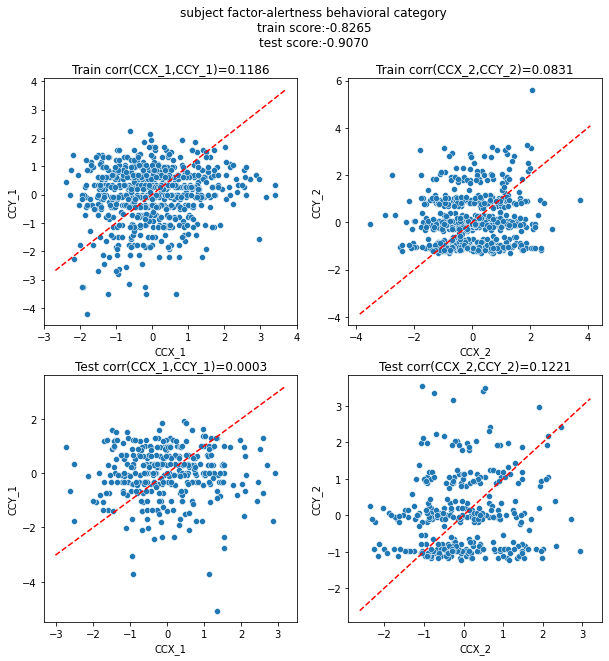

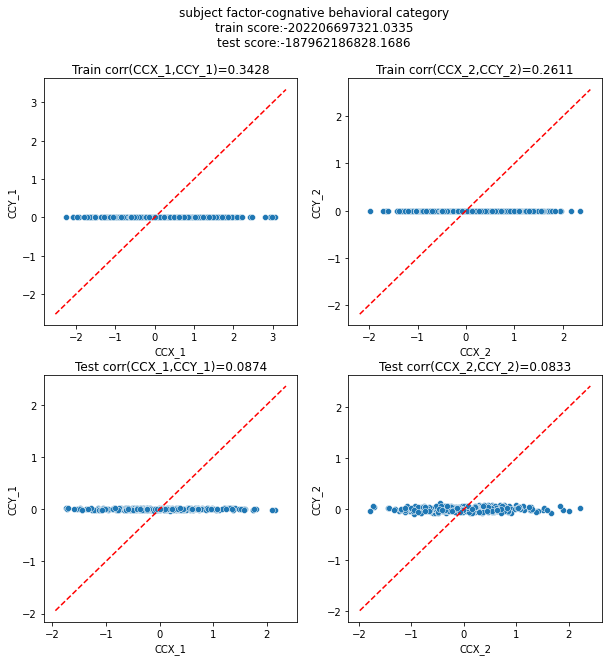

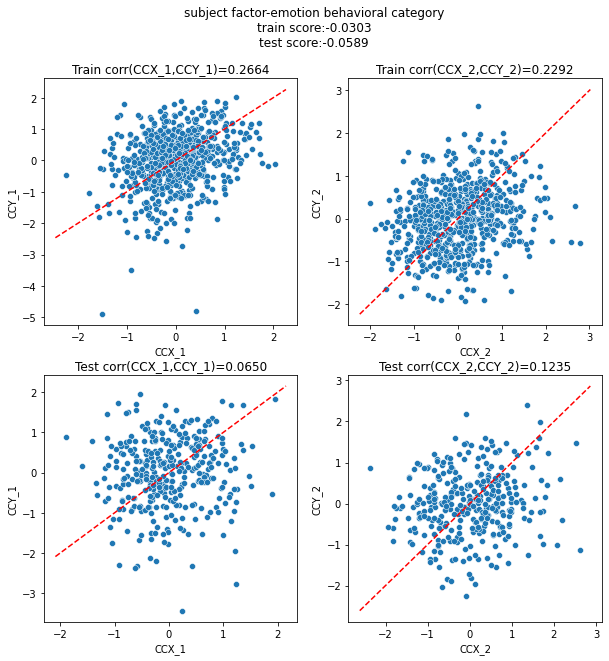

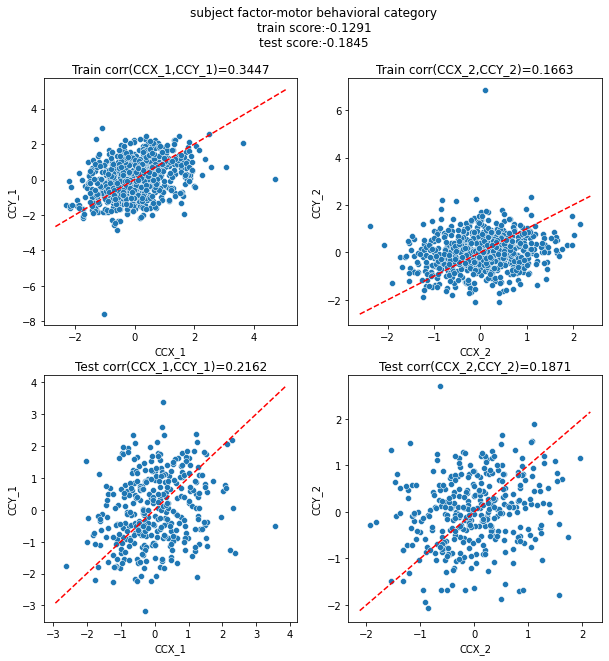

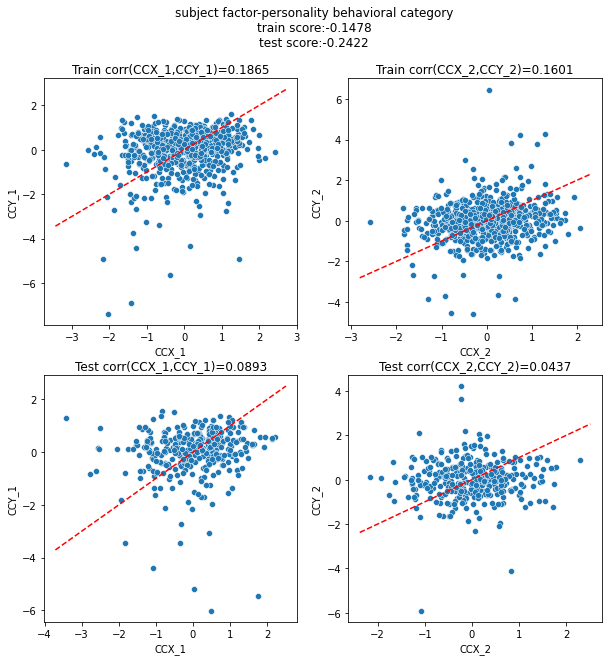

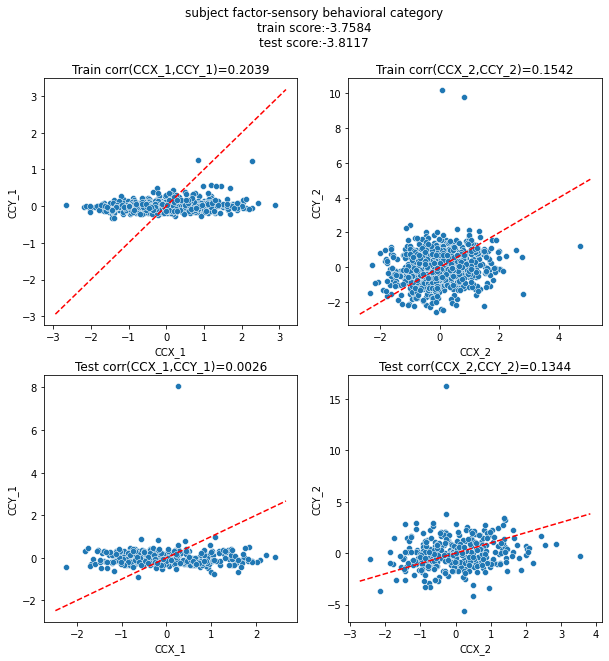

In [95]:
_cca(sub_fact_df, alrt_df, 'subject factor-alertness behavioral category')
_cca(cog_sub_fact_df, cog_df, 'subject factor-cognative behavioral category')
_cca(emot_sub_fact_df, emot_df, 'subject factor-emotion behavioral category')
_cca(motor_sub_fact_df, motor_df, 'subject factor-motor behavioral category')
_cca(pers_sub_fact_df, pers_df, 'subject factor-personality behavioral category')
_cca(sense_sub_fact_df, sense_df, 'subject factor-sensory behavioral category')

##### shuffle subject factors

put in noise to see if breaks CCA

In [19]:
cog_sub_fact_df_shuff = cog_sub_fact_df.sample(frac=1)
# display(sub_fact_df_shuff)

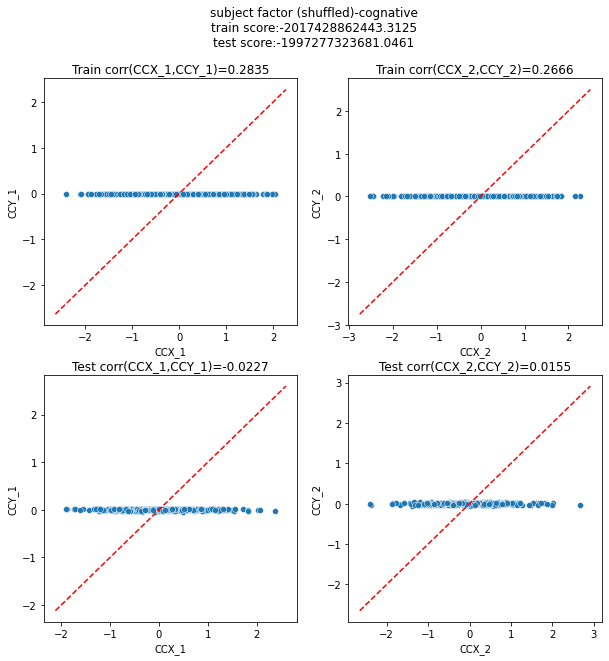

In [96]:
_cca(cog_sub_fact_df_shuff, cog_df, 'subject factor (shuffled)-cognative')

## Predicting Reading Scores from White Matter

Predict reading scores from callosal factors. 

_Compare to SGL and XGBoost results in other notebooks_

#### Reading score distribution

Is there sufficent varation in reading scores?
- _this was more of question when using the test-retest dataset_

#### Linear Model

Originally, looking to model multivariate subject factors to multivariate behavioral traits (e.g. the two alertness scores).

Here we look just at ability to predict a single behavioral trait reading scores from white matter subject factors using OLS

In [37]:
def _linear_model_reading(X, Y):
    import statsmodels.api as sm
    X.reset_index(drop=True, inplace=True)
    X = X.add_prefix('factor_')
    Y.reset_index(drop=True, inplace=True)
    y = Y['ReadEng_Unadj']
    
    print('ReadEng_Unadj ~ factors')
    model = sm.OLS(endog=y, exog=X)
    results = model.fit()
    display(results.summary())
    
    print('ReadEng_Unadj ~ constant + factors')
    X = sm.add_constant(X)
    model = sm.OLS(endog=y, exog=X)
    results = model.fit()
    display(results.summary())

In [39]:
_linear_model_reading(cog_sub_fact_df, cog_df)

ReadEng_Unadj ~ factors


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          ReadEng_Unadj   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):              0.009
Method:                 Least Squares   F-statistic:                              2.526
Date:                Wed, 28 Jul 2021   Prob (F-statistic):                      0.0197
Time:                        10:58:20   Log-Likelihood:                         -1453.3
No. Observations:                1030   AIC:                                      2919.
Df Residuals:                    1024   BIC:                                      2948.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
factor_0       0.0429      0.037      1.153      0.249      -0.030       0.116
factor_1       0.0692      0.038      1.810      0.071      -0.006       0.144
factor_2       0.0902      0.046      1.950      0.051      -0.001       0.181
factor_3       0.0904      0.042      2.154      0.031       0.008       0.173
factor_4       0.0021      0.032      0.066      0.948      -0.061       0.066
factor_5      -0.0043      0.048     -0.090      0.928      -0.099       0.090
==============================================================================
Omnibus:                        3.643   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                3.523
Skew:                          -0.119   Prob(JB):                        0.172
Kurtosis:                       3.159   Cond. No.                         3.17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ReadEng_Unadj ~ constant + factors


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ReadEng_Unadj   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.523
Date:                Wed, 28 Jul 2021   Prob (F-statistic):             0.0198
Time:                        10:58:20   Log-Likelihood:                -1453.3
No. Observations:                1030   AIC:                             2921.
Df Residuals:                    1023   BIC:                             2955.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.031      0.044      0.965      -0.060       0.062
factor_0       0.0429      0.037      1.152      0.250      -0.030       0.116
factor_1       0.0693      0.038      1.809      0.071      -0.006       0.144
factor_2       0.0902      0.046      1.949      0.052      -0.001       0.181
factor_3       0.0904      0.042      2.153      0.032       0.008       0.173
factor_4       0.0021      0.032      0.066      0.948      -0.062       0.066
factor_5      -0.0043      0.048     -0.090      0.928      -0.099       0.090
==============================================================================
Omnibus:                        3.643   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.162   Jarque-Bera (JB):                3.523
Skew:                          -0.119   Prob(JB):                        0.172
Kurtosis:                       3.159   Cond. No.                         3.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Linear Regression
Predicting Reading Score using a linear model with boostrapped five fold (KFold) cross validation

From Jasons studies know that FA is loaded in posterior callosum and associated with reading scores

**TODO:**

- [ ] Create TCA Sklearn Estimator so do not peak at data when constructing factors 

  https://scikit-learn.org/stable/developers/develop.html#estimators

In [23]:
def _predict_reading(factors=sub_fact_df, reading_score=behav_df['ReadEng_Unadj']):
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import KFold
    from sklearn.metrics import r2_score
    from scipy.stats import scoreatpercentile
    import numpy as np
    import matplotlib.pyplot as plt

    factors.reset_index(drop=True, inplace=True)
    reading_score.reset_index(drop=True, inplace=True)
    
    n_bootstrap_samples = 1000
    to_sample = np.arange(factors.shape[0])
    r2 = []
    
    for bb in np.arange(n_bootstrap_samples):
        # sampling with replacement
        idx = np.random.choice(to_sample, size=factors.shape[0])
        X = factors.iloc[idx]
        y = reading_score.iloc[idx]

        pipe = Pipeline([
                ('scale', StandardScaler()),
                ('lm', LinearRegression(fit_intercept=True))])

        kf = KFold() # Default is 5-fold

        y_hats = []
        y_true = []
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index].values, y.iloc[test_index].values
            pipe.fit(X_train, y_train)
            y_true.append(y_test)
            y_hats.append(pipe.predict(X_test))

        y_true = np.concatenate(y_true)
        y_hats = np.concatenate(y_hats)

        r2.append(r2_score(y_true, y_hats))
    
    plt.hist(r2, density=True, bins=50)
    plt.title('r2 score distribution')
    plt.xlabel('r2 score')
    plt.show()
    
    is_it_good = scoreatpercentile(r2, 2.5)
    print(is_it_good)
    print(is_it_good > 0)

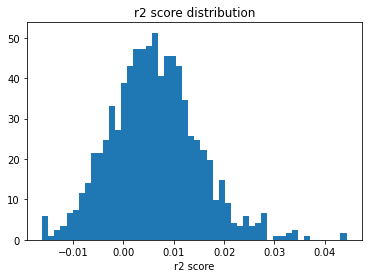

-0.00957831359589189
False


In [25]:
_predict_reading(
    _get_subject_factors_df(_ensemble, normalize=False), 
    _get_behavioral(bucket='hcp.afq', numeric=True, normalize=False)['ReadEng_Unadj']
)

**Conclusion: Linear model on selected callosal TCA subject factors was not a good fit to predict Reading Scores**

#### XGBoost

In [114]:
from sklearn.model_selection import RepeatedKFold

def _xgb(
    X, 
    y,
    cv=RepeatedKFold(n_splits=5, n_repeats=10),
    shuffle_y=False,
    show_y_train_distribution=False):
    import pandas as pd
    import numpy as np
    from xgboost import XGBRegressor
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import cross_validate, train_test_split

    import warnings
    
    warnings.filterwarnings(action='ignore', category=UserWarning)
    
    X.reset_index(drop=True, inplace=True)
    y.reset_index(drop=True, inplace=True)
        
    if shuffle_y:
        np.random.shuffle(y)
    
    xgb_reg = XGBRegressor(
        objective="reg:squarederror",
        nthread=4,
        colsample_bytree=0.86,
        gamma=0.01,
        learning_rate=0.005,
        max_depth=2,
        min_child_weight=2,
        n_estimators=3000,
        subsample=0.2
    )
    
    steps = [
        ('boost', xgb_reg)
    ]
    
    pipe = Pipeline(steps=steps)
    
    scores = cross_validate(pipe, X, y, cv=cv, return_estimator=True, return_train_score=True)

    train_score = np.mean(scores['train_score'])
    train_score_std = np.std(scores['train_score'])
    test_score = np.mean(scores['test_score'])
    test_score_std = np.std(scores['test_score'])
    
    return pd.Series(data=[train_score, train_score_std, test_score, test_score_std], 
                     index=['train score', 'train std', 'test score', 'test std'])

_xgb(
    _get_subject_factors_df(_ensemble, normalize=False), 
    _get_behavioral(bucket='hcp.afq', numeric=True, normalize=False)['ReadEng_Unadj']
)

train score    0.244297
train std      0.009004
test score    -0.045946
test std       0.038536
dtype: float64

**Conclusion: XGBoost on selected callosal TCA subject factors was not a good fit to predict Reading Scores**

##### Check all factors and replicates

multiple testing problem? - 'p-hacking', but curious if any of the TCA subject factors have any predictive power

postive r2 scores for TCA subject factors


,train score,train std,test score,test std


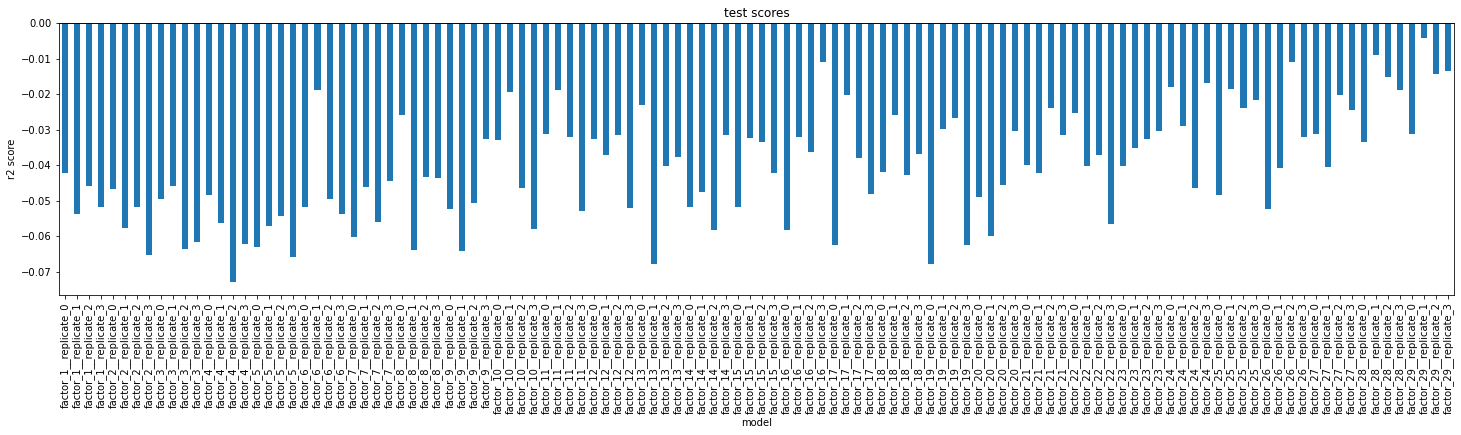

In [153]:
import pandas as pd
results = []
model_names = []
for factor in range(28):
    for replicate in range(4):
        model_names.append(f'factor_{factor+1}__replicate_{replicate}')
        results.append(_xgb(
            pd.DataFrame(_ensemble.factors(factor+1)[replicate].factors[0]), 
            _get_behavioral(bucket='hcp.afq', numeric=True, normalize=False)['ReadEng_Unadj']
        ))


pos_results_df = results_df.T[results_df.T['test score'] > 0]
print('postive r2 scores for TCA subject factors')
display(pos_results_df)

import matplotlib.pyplot as plt
results_df = pd.concat(results, axis=1, keys=model_names)
results_df.T['test score'].plot.bar(figsize=(25,5))
plt.axhline(y=0, c="black")
plt.title('test scores')
plt.xlabel('model')
plt.ylabel('r2 score')
plt.show()

##### Subject Factor products

for now looking at largest number of components and first replicate

(1041, 8)
(1041, 4)
(1041, 100)


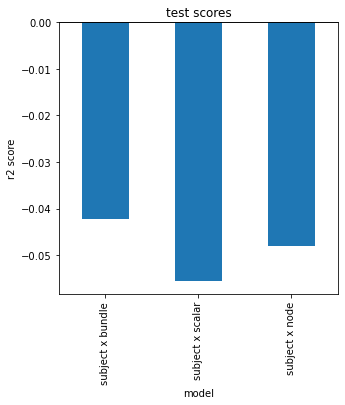

In [155]:
import numpy as np
factor_product_results = []
for i in [1, 2, 3]:
    factor_product = np.dot(_ensemble.factors(29)[0].factors[0], _ensemble.factors(29)[0].factors[i].T)
#     print(factor_product.shape)
    factor_product_results.append(_xgb(
        pd.DataFrame(factor_product), 
        _get_behavioral(bucket='hcp.afq', numeric=True, normalize=False)['ReadEng_Unadj']
    ))

factor_product_results_df = pd.concat(factor_product_results, axis=1, keys=['subject x bundle', 'subject x scalar', 'subject x node'])
factor_product_results_df.T['test score'].plot.bar(figsize=(5,5))
plt.axhline(y=0, c="black")
plt.title('test scores')
plt.xlabel('model')
plt.ylabel('r2 score')
plt.show()

##### rao product factors

**TODO**

- [ ] not sure if reshape is correct

In [181]:
from tensortools.operations import khatri_rao

rao_product = khatri_rao([_ensemble.factors(29)[0].factors[0],
            _ensemble.factors(29)[0].factors[1], 
            _ensemble.factors(29)[0].factors[2]]).reshape((1041,8*4*29))

_xgb(
    pd.DataFrame(rao_product), 
    _get_behavioral(bucket='hcp.afq', numeric=True, normalize=False)['ReadEng_Unadj']
)

train score    0.413343
train std      0.008346
test score    -0.013774
test std       0.043298
dtype: float64